# Harish Practise: Feature Selection Using VIF

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('salaries.csv')
df

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297
...,...,...,...,...,...
995,12,2,32,10,103056
996,16,2,35,10,107691
997,13,3,33,8,100478
998,19,2,40,2,100085


In [6]:
df.shape

(1000, 5)

# Train a Model With All Features

In [7]:
X = df.drop('Salary', axis = 'columns')
y = df['Salary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

model_full = LinearRegression()
model_full.fit(X_train,y_train)
model_full.score(X_test,y_test)

0.9573435270584794

In [9]:
X.columns

Index(['Years of Experience', 'Education Level', 'Age', 'Location Factor'], dtype='object')

In [10]:
model_full.intercept_

52364.00922527785

In [11]:
model_full.coef_

array([2113.25086871, 5112.60645867, -119.37097695, 1488.22861091])

In [12]:
X_test[:1]

,Years of Experience,Education Level,Age,Location Factor
521,15,3,37,5


In [13]:
y_test[:1]

521    97186
Name: Salary, dtype: int64

In [14]:
model_full.intercept_ + model_full.coef_[0]*38 + model_full.coef_[1]*1 + model_full.coef_[2]*56 + model_full.coef_[3]*9

144489.43148406508

In [15]:
model_full.predict(X_test[:1])

array([102425.00853941])

<Axes: xlabel='Age', ylabel='Salary'>

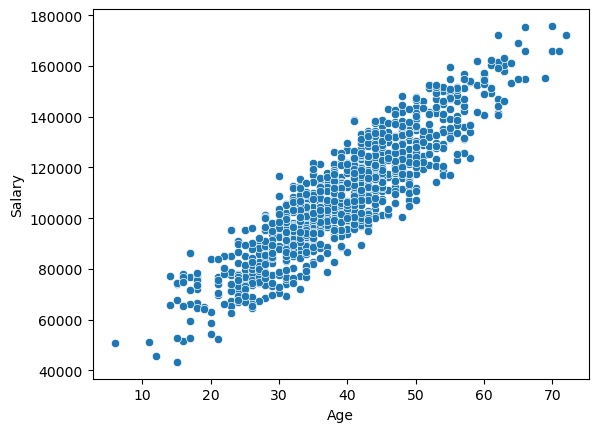

In [16]:
sns.scatterplot(df, x="Age", y="Salary")

### Let's Understand Multicolinearity Using VIF

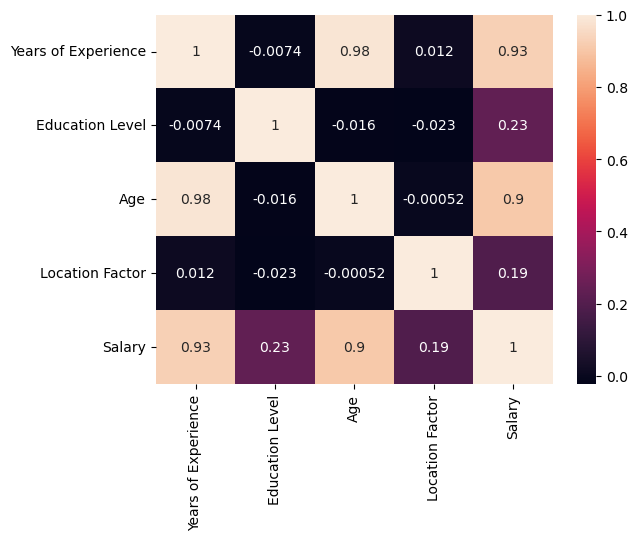

In [17]:
cm = df.corr()

sns.heatmap(cm,annot=True)
plt.show()

### Compute Variance Inflation Factor (VIF)

In [19]:
!pip install statsmodels

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variance'] = data.columns
    vif_df['VIF'] = [Variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [22]:
X = df.drop('Salary', axis="columns")

calculate_vif(X)

NameError: name 'Variance_inflation_factor' is not defined